In [0]:
from google.colab import files
uploaded = files.upload()

Saving ^NDX.csv to ^NDX (1).csv


In [0]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['^NDX.csv']))


In [0]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-03-29,1960.630005,1968.430054,1956.599976,1961.219971,1961.219971,1967850000
1,2010-03-30,1966.510010,1974.469971,1955.219971,1967.959961,1967.959961,2147270000
2,2010-03-31,1962.170044,1969.900024,1955.150024,1958.339966,1958.339966,2368690000
3,2010-04-01,1968.439941,1979.489990,1943.969971,1959.560059,1959.560059,2340270000
4,2010-04-05,1964.030029,1981.069946,1958.010010,1977.829956,1977.829956,2130340000
...,...,...,...,...,...,...,...
1560,2016-06-08,4521.100098,4529.089844,4505.390137,4520.629883,4520.629883,1692640000
1561,2016-06-09,4501.149902,4518.500000,4494.759766,4512.689941,4512.689941,1632340000
1562,2016-06-10,4473.080078,4480.479980,4447.330078,4461.049805,4461.049805,1822200000
1563,2016-06-13,4436.120117,4461.270020,4419.729980,4422.759766,4422.759766,1888300000


In [0]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

df.index = df['Date']

In [0]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-03-29,2010-03-29,1960.630005,1968.430054,1956.599976,1961.219971,1961.219971,1967850000
2010-03-30,2010-03-30,1966.510010,1974.469971,1955.219971,1967.959961,1967.959961,2147270000
2010-03-31,2010-03-31,1962.170044,1969.900024,1955.150024,1958.339966,1958.339966,2368690000
2010-04-01,2010-04-01,1968.439941,1979.489990,1943.969971,1959.560059,1959.560059,2340270000
2010-04-05,2010-04-05,1964.030029,1981.069946,1958.010010,1977.829956,1977.829956,2130340000


In [0]:
#importing libraries

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [0]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [0]:
new_data

,Date,Close
0,2010-03-29 00:00:00,1961.22
1,2010-03-30 00:00:00,1967.96
2,2010-03-31 00:00:00,1958.34
3,2010-04-01 00:00:00,1959.56
4,2010-04-05 00:00:00,1977.83
...,...,...
1560,2016-06-08 00:00:00,4520.63
1561,2016-06-09 00:00:00,4512.69
1562,2016-06-10 00:00:00,4461.05
1563,2016-06-13 00:00:00,4422.76


In [0]:
#setting index

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

In [0]:
dataset

array([[1961.219971],
       [1967.959961],
       [1958.339966],
       ...,
       [4461.049805],
       [4422.759765999999],
       [4424.910156]], dtype=object)

In [0]:
# Split train and test

train = dataset[0:999,:]
valid = dataset[999:,:]

In [0]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [0]:
import numpy as np
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 32s - loss: 0.0013


In [0]:
inputs = new_data[len(new_data) - len(valid) - 60:].values

inputs = inputs.reshape(-1,1)

inputs  = scaler.transform(inputs)

In [0]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [0]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms


91.3218159859723

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


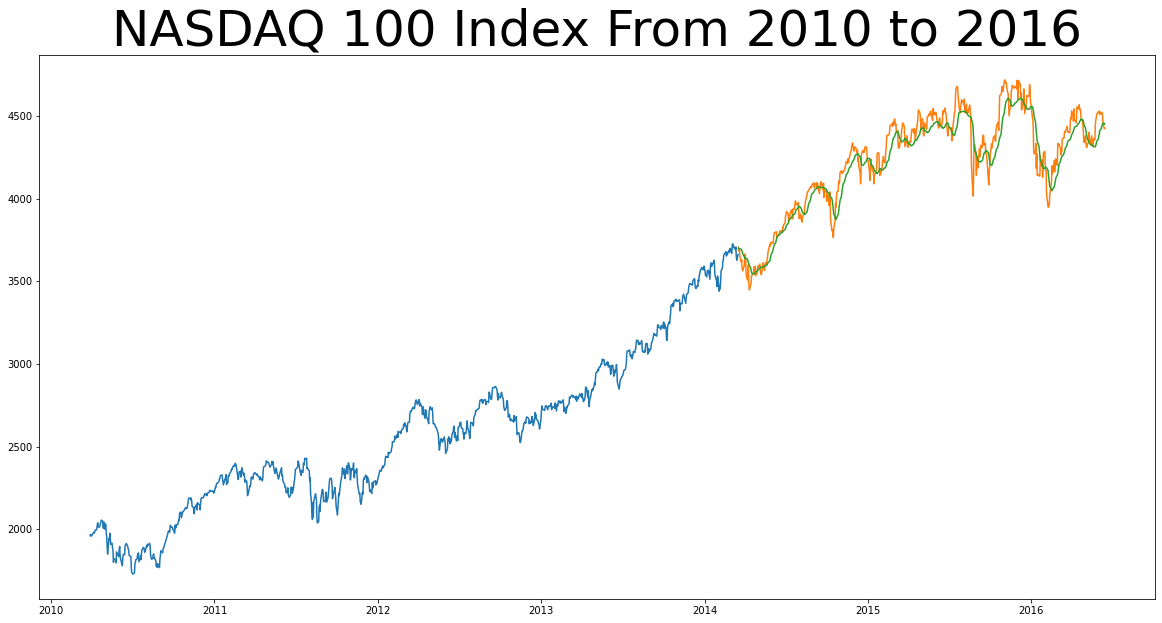

In [0]:
#to plot within notebook

import matplotlib.pyplot as plt

%matplotlib inline

#setting figure size
#setting index as date



from matplotlib.pylab import rcParams
from matplotlib.dates import DateFormatter

rcParams['figure.figsize'] = 20,10

train = new_data[:999]
valid = new_data[999:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title('NASDAQ 100 Index From 2010 to 2016', fontsize = 50)
date_form = DateFormatter("%Y")

In [0]:
from google.colab import files
uploaded = files.upload()

Saving orange.csv to orange (1).csv


In [0]:
df2 = pd.read_csv(io.BytesIO(uploaded['orange.csv']))

In [0]:
df2

,Unnamed: 0,Date,polarity
0,1,2008-08-08,-1.156250
1,2,2008-08-11,-0.888889
2,3,2008-08-12,-1.095238
3,4,2008-08-13,-0.600000
4,5,2008-08-14,-0.730769
...,...,...,...
1984,1985,2016-06-27,-0.645161
1985,1986,2016-06-28,-1.240000
1986,1987,2016-06-29,-0.566667
1987,1988,2016-06-30,-1.194444
